In [1]:
# 실행결과 경고메시지 출력 제외
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import graphviz

from sklearn.tree import export_graphviz
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.api import Logit
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, roc_curve, auc

matplotlib.rc("font", family="Malgun Gothic")

# 서포트 벡터 머신_분류

유방암 결과를 분류하는 서포트 벡터 머신 모델을 만들고   
predict method를 이용하여 목표변수 범주를 예측하라.  
그리고 모델의 정확도와 confusion matrix를 구하라.
- 데이터 : 유방암.CSV(변수: 31개, 자료 수: 320개)
- 목표변수(diagnosis : 양성(108개), 음성(benign, 212개)

|변수|변수 설명|변수 역할|변수 형태|
|---|---|---|---|
|diagnosis|진단결과(음성, 양성)|목표변수|이산형|
|mean radius|(세포)평균 반경|설명변수|연속형|
|mean texture|(세포)평균 질감|설명변수|연속형|
|mean perimeter|(세포)평균 둘레|설명변수|연속형|
|mean area|(세포)평균 면적|설명변수|연속형|
|mean smoothness|(세포)평균 매끄러움|설명변수|연속형|
|mean compactness|(세포)평균 조그만 정도|설명변수|연속형|
|mean concavity|(세포)평균 오목함|설명변수|연속형|
|mean concave points|(세포)평균 오목한 점의 수|설명변수|연속형|
|mean symmetry|(세포)평균 대칭|설명변수|연속형|
|mean fractal dimension|(세포)평균 프랙탈 차원|설명변수|연속형|
|radius error|(세포)반경의 표준오차|설명변수|연속형|
|texture error|(세포)질감의 표준오차|설명변수|연속형|
|perimeter error|(세포)둘레의 표준오차|설명변수|연속형|
|area error|(세포)면적의 표준오차|설명변수|연속형|
|smoothness error|(세포)매끄러움의 표준오차|설명변수|연속형|
|compactness error|(세포)조그만 정도의 표준오차|설명변수|연속형|
|concavity error|(세포)오목함의 표준오차|설명변수|연속형|
|concave points error|(세포)오목한 점의 수의 표준오차|설명변수|연속형|
|symmetry error|(세포)대칭의 표준오차|설명변수|연속형|
|fractal dimension error|(세포)프랙탈 차원의 표준오차|설명변수|연속형|
|worst radius|(세포)최대 반경|설명변수|연속형|
|worst texture|(세포)최대 질감|설명변수|연속형|
|worst perimeter|(세포)최대 둘레|설명변수|연속형|
|worst area|(세포)최대 면적|설명변수|연속형|
|worst smoothness|(세포)최대 매끄러움|설명변수|연속형|
|worst compactness|(세포)최대 조그만 정도|설명변수|연속형|
|worst concavity|(세포)최대 오목함|설명변수|연속형|
|worst concave points|(세포)최대 오목한 점의 수|설명변수|연속형|
|worst symmetry|(세포)최대 대칭|설명변수|연속형|
|worst fractal dimension|(세포)최대 프랙탈 차원|설명변수|연속형|


## 1. 데이터 구성하기

In [2]:
df_raw=pd.read_csv("../data/유방암.csv", engine="python")
df_raw.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,음성,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,양성,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,음성,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,양성,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,양성,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [3]:
df_raw.isnull().sum(axis=0)

diagnosis                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
dtype: int64

> 결측치 없음.

In [4]:
# get_dummies: 데이터의 문자형 변수에 대한 더미변수 생성
df_raw_dummy=pd.get_dummies(df_raw)
# diagnosis_음성 제거 -> diagnosis_양성 결과가 1이면 양성, 0이면 음성
df_raw_dummy=df_raw_dummy.drop("diagnosis_음성", axis=1)
df_raw_dummy.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,diagnosis_양성
0,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,0.05986,...,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740,0
1,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,0.06400,...,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699,1
2,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938,0
3,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,0.05669,...,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273,1
4,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,0.05581,...,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915,1


In [5]:
# 목표변수, 설명변수 데이터 지정
df_raw_y=df_raw_dummy["diagnosis_양성"]
df_raw_x=df_raw_dummy.drop("diagnosis_양성", axis=1, inplace=False)

In [6]:
# train_test_split(X: 설명변수 데이터, Y: 목표변수 데이터, test_size=test 데이터 비율, random_state: random seed)
df_train_x, df_test_x, df_train_y, df_test_y=train_test_split(df_raw_x, df_raw_y, test_size=0.4, random_state=1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (192, 30)
train data Y size : (192,)
test data X size : (128, 30)
test data Y size : (128,)


## 2. 모델 생성 및 Parameter 조정, 평가

In [7]:
svm_uncustomized=SVC(random_state=1234)
svm_uncustomized.fit(df_train_x, df_train_y)
# train 데이터 정확도
print("Accuracy on training set: {:.3f}".format(svm_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 정확도
print("Accuracy on test set: {:.3f}".format(svm_uncustomized.score(df_test_x, df_test_y)))


Accuracy on training set: 0.885
Accuracy on test set: 0.891


> 모델 정확도는 train 88.5%, test 89.1%로   
> 모델은 train 데이터에 underfitting 되어있음.

- C: 규제에 대한 강도 변경

In [8]:
# train 및 test 설명력 결과 저장
train_accuracy=[]; test_accuracy=[]
# c: 규제(0.01, 0.1, 1, 10)
#para_c=[10**c for c in range(-2, 2)]
para_c=[c*0.1 for c in range(1, 10)]#C 변화 구간 변경

for v_C in para_c:
    svm=SVC(random_state=1234, C=v_C)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))
    
# 결과 저장
df_accuracy_c=pd.DataFrame()
df_accuracy_c["C"]=para_c
df_accuracy_c["Trainaccuracy"]=train_accuracy
df_accuracy_c["Testaccuracy"]=test_accuracy

# 모델 정확도 확인
df_accuracy_c.round(3)

,C,Trainaccuracy,Testaccuracy
0,0.1,0.854,0.859
1,0.2,0.875,0.867
2,0.3,0.885,0.875
3,0.4,0.880,0.867
4,0.5,0.880,0.867
5,0.6,0.880,0.867
6,0.7,0.885,0.891
7,0.8,0.885,0.891
8,0.9,0.885,0.891


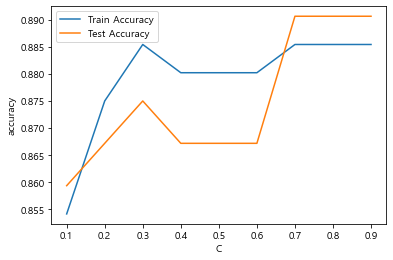

In [9]:
# 모델 정확도 그래프 확인
plt.plot(para_c, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_c, test_accuracy, linestyle="-", label="Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("C")
plt.legend()

> Train/Test 데이터의 성능을 고려하여 0.65 선택

- Gamma: 훈련 샘플이 미치는 영향의 범위를 변경

In [10]:
# train 및 test 설명력 결과 저장
train_accuracy=[]; test_accuracy=[]
# gamma: 규제(0.01, 0.1, 1, 10)
#para_gamma=[10**gamma for gamma in range(-2, 2)]
para_gamma=[gamma*0.1 for gamma in range(1, 10)]#C 변화 구간 변경

for v_gamma in para_gamma:
    svm=SVC(random_state=1234, C=0.65, gamma=v_gamma)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))
    
# 결과 저장
df_accuracy_gamma=pd.DataFrame()
df_accuracy_gamma["gamma"]=para_gamma
df_accuracy_gamma["Trainaccuracy"]=train_accuracy
df_accuracy_gamma["Testaccuracy"]=test_accuracy

# 모델 정확도 확인
df_accuracy_gamma.round(3)

,gamma,Trainaccuracy,Testaccuracy
0,0.1,1.0,0.766
1,0.2,1.0,0.766
2,0.3,1.0,0.766
3,0.4,1.0,0.766
4,0.5,1.0,0.766
5,0.6,1.0,0.766
6,0.7,1.0,0.766
7,0.8,1.0,0.766
8,0.9,1.0,0.766


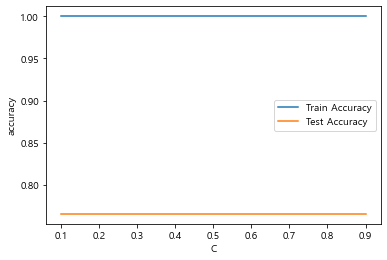

In [11]:
# 모델 정확도 그래프 확인
plt.plot(para_gamma, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_gamma, test_accuracy, linestyle="-", label="Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("C")
plt.legend()

> gamma 변화는 정확도에 영향을 미치지 않음  
> (범위를 (0.01, 0.1, 1, 10)으로 해도 동일)


- Standardscaler: 설명변수 값의 구간을 동일하게 변경

In [12]:
# 변수명 저장
v_feature_name=df_train_x.columns
# StandardScaler 적용
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df_raw_x)
df_scaled=pd.DataFrame(df_scaled, columns=v_feature_name)
df_scaled.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,-0.157678,-0.879112,-0.165550,-0.232872,-0.744948,-0.479220,-0.550769,-0.628488,-0.997431,-0.392627,...,-0.149283,-1.156442,-0.153789,-0.224951,0.490637,0.139396,-0.094470,-0.301949,0.525611,0.511081
1,-1.312779,-2.560965,-1.328928,-1.150194,-0.240274,-1.153621,-1.143404,-1.199934,-1.773612,0.184077,...,-1.341759,-2.517236,-1.380396,-1.124201,0.254373,-1.046076,-1.159323,-1.480312,-1.387506,-0.507149
2,0.695279,-0.420644,0.602798,0.596040,-0.947380,-0.675307,-0.477679,-0.212084,-0.899042,-1.174101,...,0.534893,-0.143296,0.445031,0.432104,-0.613360,-0.367031,0.004076,0.172850,0.223844,-0.886803
3,-0.211154,-1.301385,-0.255876,-0.308762,-1.291796,-0.661126,-0.788224,-0.834410,-0.658535,-0.834209,...,-0.263312,-1.490846,-0.312546,-0.354487,-1.339335,-0.169261,-0.176669,-0.458230,-0.524077,-0.220788
4,-0.753945,-1.738136,-0.820314,-0.745704,-2.095198,-1.505004,-1.175403,-1.326415,-1.933950,-0.956793,...,-0.951354,-1.934512,-0.997708,-0.869505,-1.783511,-1.108951,-1.094404,-1.366747,-1.071301,-0.898278


In [13]:
# 데이터 분할
df_scaled_train_x, df_scaled_test_x=train_test_split(df_scaled, test_size=0.4, random_state=1234)
print("train data X size: {}".format(df_scaled_train_x.shape))
print("test data X size: {}".format(df_scaled_test_x.shape))

train data X size: (192, 30)
test data X size: (128, 30)


- scale이 조정된 데이터로 새로운 모델 생성

In [14]:
svm_scaled=SVC(random_state=1234)
svm_scaled.fit(df_scaled_train_x, df_train_y)
# train 데이터 정확도
print("Accuracy on training set: {:.3f}".format(svm_scaled.score(df_train_x, df_train_y)))
# test 데이터 정확도
print("Accuracy on test set: {:.3f}".format(svm_scaled.score(df_test_x, df_test_y)))


Accuracy on training set: 0.599
Accuracy on test set: 0.758


> 모델 정확도는 train 59.9%, test 75.8%로   
> 모델은 train 데이터에 underfitting 되어있음.

- C: 규제에 대한 강도 변경

In [15]:
# train 및 test 설명력 결과 저장
train_accuracy=[]; test_accuracy=[]
# c: 규제(0.01, 0.1, 1, 10)
#para_c=[10**c for c in range(-2, 2)]
para_c=[c*0.1 for c in range(1, 10)]#C 변화 구간 변경

for v_C in para_c:
    svm=SVC(random_state=1234, C=v_C)
    svm.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x, df_test_y))
    
# 결과 저장
df_accuracy_c=pd.DataFrame()
df_accuracy_c["C"]=para_c
df_accuracy_c["Trainaccuracy"]=train_accuracy
df_accuracy_c["Testaccuracy"]=test_accuracy

# 모델 정확도 확인
df_accuracy_c.round(3)

,C,Trainaccuracy,Testaccuracy
0,0.1,0.964,0.906
1,0.2,0.969,0.930
2,0.3,0.974,0.930
3,0.4,0.979,0.938
4,0.5,0.984,0.930
5,0.6,0.995,0.938
6,0.7,0.995,0.945
7,0.8,0.995,0.953
8,0.9,0.995,0.953


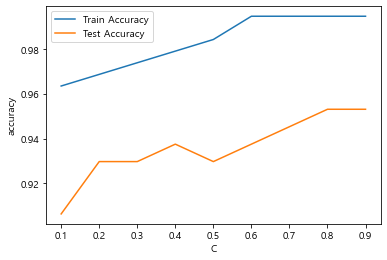

In [16]:
# 모델 정확도 그래프 확인
plt.plot(para_c, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_c, test_accuracy, linestyle="-", label="Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("C")
plt.legend()

> Train/Test 데이터의 성능을 고려하여 0.8 선택

- Gamma: 훈련 샘플이 미치는 영향의 범위를 변경

In [17]:
# train 및 test 설명력 결과 저장
train_accuracy=[]; test_accuracy=[]
# gamma: 규제(0.01, 0.1, 1, 10)
#para_gamma=[10**gamma for gamma in range(-2, 2)]
para_gamma=[gamma*0.1 for gamma in range(1, 10)]#C 변화 구간 변경

for v_gamma in para_gamma:
    svm=SVC(random_state=1234, C=0.8, gamma=v_gamma)
    svm.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x, df_test_y))
    
# 결과 저장
df_accuracy_gamma=pd.DataFrame()
df_accuracy_gamma["gamma"]=para_gamma
df_accuracy_gamma["Trainaccuracy"]=train_accuracy
df_accuracy_gamma["Testaccuracy"]=test_accuracy

# 모델 정확도 확인
df_accuracy_gamma.round(3)

,gamma,Trainaccuracy,Testaccuracy
0,0.1,0.995,0.922
1,0.2,1.000,0.906
2,0.3,1.000,0.875
3,0.4,1.000,0.859
4,0.5,1.000,0.844
5,0.6,1.000,0.820
6,0.7,1.000,0.781
7,0.8,1.000,0.773
8,0.9,1.000,0.773


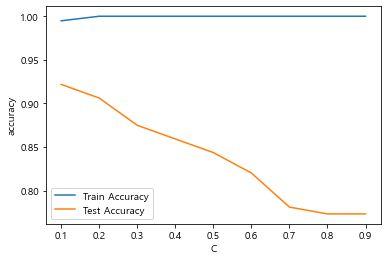

In [18]:
# 모델 정확도 그래프 확인
plt.plot(para_gamma, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_gamma, test_accuracy, linestyle="-", label="Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("C")
plt.legend()

> gamma가 증가함에 따라 Test 성능이 감소  
> 데이터 성능을 고려하여 0.1 선택


- GridSearchCV를 이용한 최적 parameter 찾기

In [19]:
estimator=SVC(random_state=1234)
# 구하고자 하는 parameter와 범위
param_grid={"C":para_c, "gamma":para_gamma}
# 정확도가 높은 최적 parameter 찾기
grid_svm = GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs=-1)
grid_svm.fit(df_scaled_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_svm.best_estimator_))
print("\nbest parameter: \n{}".format(grid_svm.best_params_))
print("\nbest score: \n{}".format(grid_svm.best_score_.round(3)))

best estimator model: 
SVC(C=0.4, gamma=0.1, random_state=1234)

best parameter: 
{'C': 0.4, 'gamma': 0.1}

best score: 
0.953


- 두 모델의 정분류율(정확도) 비교

In [20]:
## 직접 parameter를 구해본 모델의 정분류율
svm_1=SVC(random_state=1234, C=0.8, gamma=0.1)
svm_1.fit(df_scaled_train_x, df_train_y)

# 평가
y_pred1=svm_1.predict(df_scaled_test_x)
print("Accuracy: {0:.3f}\n".format(svm_1.score(df_scaled_test_x, df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred1)))

Accuracy: 0.922

Confusion matrix: 
[[91  6]
 [ 4 27]]


In [21]:
# GridSearchCV를 이용해 구한 모델의 정분류율
svm_2=SVC(random_state=1234, C=0.4, gamma=0.1)
svm_2.fit(df_scaled_train_x, df_train_y)

# 평가
y_pred1=svm_2.predict(df_scaled_test_x)
print("Accuracy: {0:.3f}\n".format(svm_2.score(df_scaled_test_x, df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred1)))

Accuracy: 0.898

Confusion matrix: 
[[92  5]
 [ 8 23]]


> 비교 결과 직접 그래프를 보며 parameter를 구한 모델의 성능이 더 좋으므로   
> 최종 모델로 선정

## 3. 최종 모델 선정 및 평가

### [목표변수 범주 예측 및 최종 모델 평가]

In [22]:
# 최종 모델
svm_final=SVC(random_state=1234, C=0.8, gamma=0.1)
svm_final.fit(df_scaled_train_x, df_train_y)

# 예측
y_pred=svm_final.predict(df_scaled_test_x)
# 1: 양성, 0: 음성
print("목표변수 범주 예측값:\n", y_pred, "\n")

# train 데이터 셋 정확도
print("Accuracy on training set: {0:.3f}\n".format(svm_final.score(df_scaled_train_x, df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set: {0:.3f}\n".format(svm_final.score(df_scaled_test_x, df_test_y)))
# confusion matrix
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

목표변수 범주 예측값:
 [0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0
 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0
 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1] 

Accuracy on training set: 0.995

Accuracy on test set: 0.922

Confusion matrix: 
[[91  6]
 [ 4 27]]


> 모델 모델의 정확도는 train 99.5%, test 92.2%로 성능이 양호하고   
> train 데이터에 과적합